# ECBM E4040 - Assignment 2 - Task 4: Data Augmentation

One important factor in neural network training is the size of the traininig set. Since it is often not possible to get a clean and large enough dataset for training, one way to improve the network's robustness and generalization ability is to create 'fake' data by injecting random noise or doing random transformations on the available data. A technique which implements this strategy is called __data augmentation__, and has shown to be very effective.

One thing to remember, when you augment your data, is to never change the correct label of a sample. For example, for hand-written digit dataset, flipping a letter 'b' ends up looking like a letter 'd', but you must keep the label for 'b'. So please choose the best augmentation methods for your dataset.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
from __future__ import print_function
import numpy as np
from ecbm4040.cifar_utils import load_data
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import rotate
import scipy
from ecbm4040.image_generator import ImageGenerator

## Load Data

In [2]:
# def myreshapeFunction(myMat):
#     myMatReshaped = np.zeros((myMat.shape[0], 32, 32, 3))
#     for index in np.arange(0, myMat.shape[0]):
#         myMatReshaped[index, :, :, 0] = np.reshape(myMat[index, 0:32*32], (32,32))
#         myMatReshaped[index, :, :, 1] = np.reshape(myMat[index, 32*32:32*32*2], (32,32))
#         myMatReshaped[index, :, :, 2] = np.reshape(myMat[index, 32*32*2:32*32*3], (32,32))
#     return(myMatReshaped)
def myreshapeFunction(myMat):
    myMatReshaped = np.zeros((myMat.shape[0], 32, 32, 3))
    
    
    myMatReshaped = np.reshape(myMat, (myMat.shape[0], 32, 32, 3), order = 'F')
    myMatReshaped = myMatReshaped.transpose(0, 2, 1, 3)
    return(myMatReshaped)

X_train, y_train, X_test, y_test = load_data()

num_train = 49000
num_val = 1000
num_test = 10000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
print("Reshaping")
X_dev = myreshapeFunction(X_dev)
X_val = myreshapeFunction(X_val)
X_train = myreshapeFunction(X_train)
X_test = myreshapeFunction(X_test)
print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
# X_train = np.array(X_train, dtype = 'float64')

(49000, 3072) (1000, 3072) (10000, 3072) (128, 3072)
Reshaping
(49000, 32, 32, 3) (1000, 32, 32, 3) (10000, 32, 32, 3) (128, 32, 32, 3)


## Part 1: Visualization

### Visualize some original images

<span style="color:red">__TODO:__</span> Use Pyplot to draw any 16 samples from the __development set__ in a 4-by-4 grid.

__Hint__: The original data is vectorized, you need to find a way to reshape it into 32*32 RGB image.

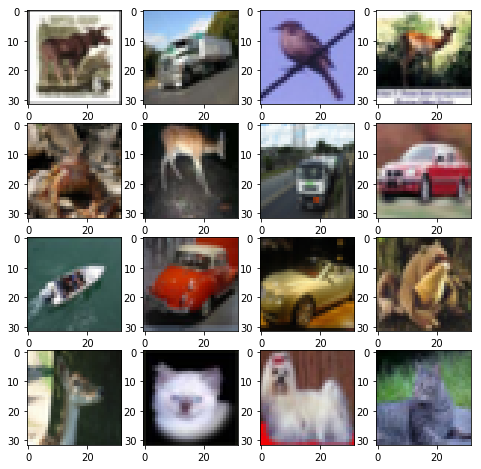

In [3]:
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
counter = 0
angle = 3
amplitude = 5
for i in range(r):
    for j in range(r):
        temp = X_dev[counter,:]
        counter += 1
        img = X_dev[counter,:]
#         img = np.pad(img, pad_width = ((10,10), (10,10), (0,0)), mode='constant')
#         img = rotate(img, angle = angle, axes=(0, 1), reshape=False, 
#                      output=None, order=3, mode='constant', cval=0.0, prefilter=True)
#         img[:,0] = rotate(img[:,0], angle)
#         img[:,1] = rotate(img[:,1], angle)
#         img[:,2] = rotate(img[:,2], angle)
#         img = scipy.ndimage.rotate(img, angle)
#         print('hey')
        #noise = np.random.normal(0, 1, size = img.shape)
#         noNoiseIndices = np.random.choice(self.x.shape[0], size = int(np.round(self.x.shape[0]*(1 - portion))), replace = False)
#         noise[noNoiseIndices,:] = 0
#         print('hey')
        #img = img + (noise*amplitude).astype(np.uint8)
#         print('hey')
        #img = np.clip(img, 0, 255, out=img)
        axarr[i][j].imshow(img)

## Part 2: Automatic batch generator

We want you to create an automatic image generator that does several kinds of data augmentations, and produces a batch of data consisting of random samples every time you call it. 

<span style="color:red">__TODO__:</span> Finish the functions of class __ImageGenerator__ in __ecbm4040/image_generator.py__. The code is fully commented with instructions.

__Hint__: The python keywords __yield__ and __next__ can help you do some tricks.

In [15]:
from ecbm4040.image_generator import ImageGenerator

<span style="color:red">__TODO__:</span> Create an ImageGenerator object using the __development set__, and use __show__ function to plot the top 16 original images.

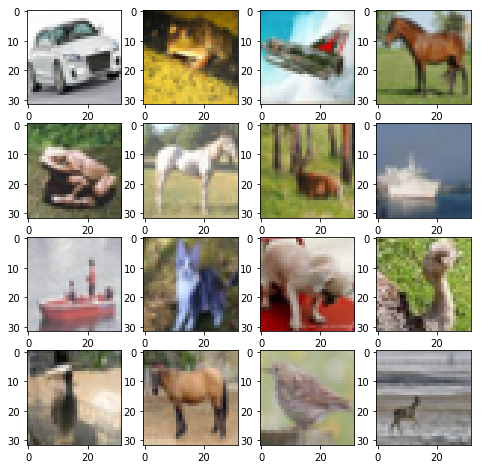

In [16]:
myGen = ImageGenerator(x = X_dev, y = y_dev)
myGen.show()
# temp = myGen.next_batch_gen(batch_size = 1)
# print(next(temp))

### Translation

<span style="color:red">__TODO:__</span> Translate the original __development set__ by several pixels in both directions, and plot the top 16 images like you just did.

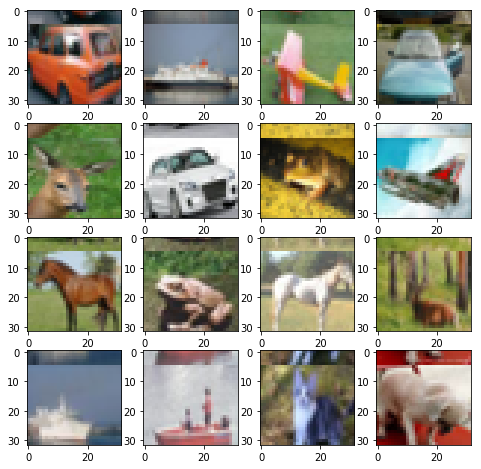

In [17]:
myGen = ImageGenerator(x = X_dev, y = y_dev)
myGen.translate(shift_height = 5, shift_width = 5)
myGen.show()

### Rotation

<span style="color:red">__TODO:__</span> Rotate the original __development set__ by several degrees, and plot the top 16 images like you just did. 

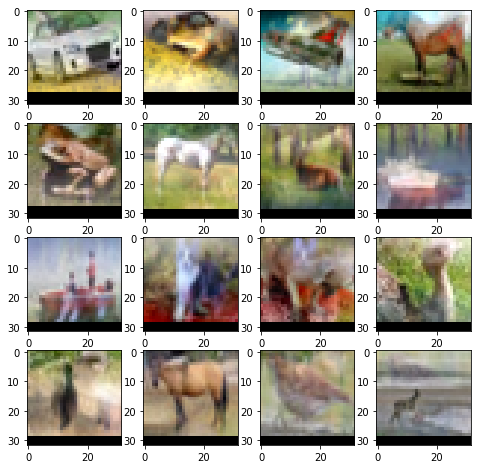

In [18]:
# YOUR CODE HERE
myGen = ImageGenerator(x = X_dev, y = y_dev)
myGen.rotate(angle = 3)
myGen.show()

### Flipping (horizontal and vertical)

<span style="color:red">__TODO:__</span> Flip the original __development set__ as you like (horizontal, vertical, or both), and plot the top 16 images like you just did. 

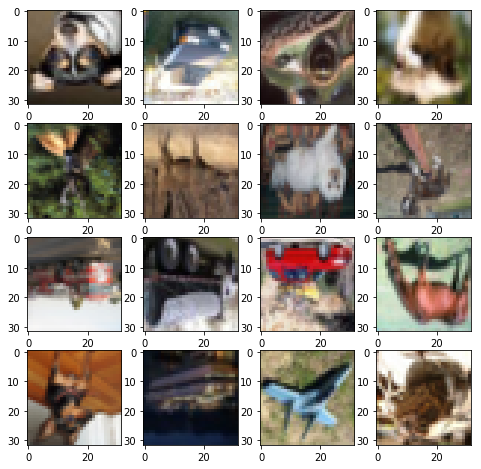

In [57]:
# YOUR CODE HERE
myGen = ImageGenerator(x = X_dev, y = y_dev)
myGen.flip(mode = 'hv')
myGen.show()

### Add Noise

<span style="color:red">__TODO:__</span> Inject random noise into the original __development set__, and plot the top 16 images like you just did.

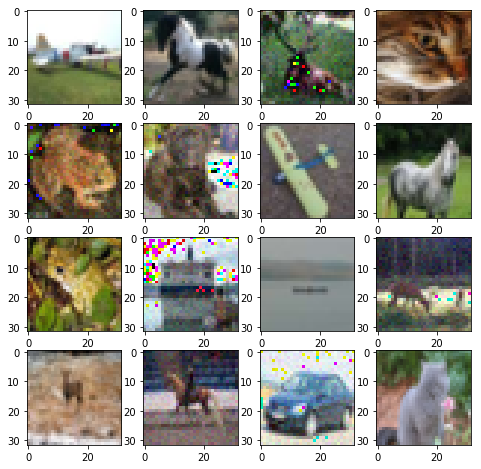

In [65]:
# YOUR CODE HERE
myGen = ImageGenerator(x = X_dev, y = y_dev)
myGen.add_noise(portion = 0.5, amplitude = 10)
myGen.show()

## Part 3: Data Augmentation + LeNet

<span style="color:red">__TODO__:</span> Now that you have your own data generator. At the end of __ecbm4040/neuralnets/cnn.py__, there is a not-implemented function __my_training_task4()__. Copy the __my_training()__ function above and modify it so that it uses your data generator for training. Train the network again - whether you see and improvement or a drop, record it and analyze why.

In [119]:
# YOUR CODE HERE
from ecbm4040.neuralnets.cnn import my_training_task4
import tensorflow as tf
tf.reset_default_graph()

# 
conv_featmap = [[20, 12]]
fc_units=[500, 250, 100]
conv_kernel_size = [[3, 3]]
pooling_size=[2]


my_training_task4(X_train, y_train, X_val, y_val, 
         conv_featmap = conv_featmap,
         fc_units = fc_units,
         conv_kernel_size = conv_kernel_size,
         pooling_size = pooling_size,
         l2_norm=0.01,
         seed=235,
         learning_rate=1e-2,
         epoch=4,
         batch_size=16,
         verbose=False,
         pre_trained_model=None,
         keepProbVal = 0.5)

Building my LeNet. Parameters: 
conv_featmap=[[20, 12]]
fc_units=[500, 250, 100]
conv_kernel_size=[[3, 3]]
pooling_size=[2]
l2_norm=0.01
seed=235
learning_rate=0.01
pooling layer shape (?, 16, 16, 12) at pool 0
Input shape for fully connected layer: (?, 3072)
number of batches for training: 3062
epoch 1
Running on no augmentation phase
Best validation accuracy! iteration:100 accuracy: 23.700000000000003%
Best validation accuracy! iteration:300 accuracy: 27.5%
Best validation accuracy! iteration:400 accuracy: 31.099999999999994%
Best validation accuracy! iteration:600 accuracy: 31.400000000000006%
Best validation accuracy! iteration:700 accuracy: 31.799999999999997%
Best validation accuracy! iteration:900 accuracy: 33.3%
Best validation accuracy! iteration:1000 accuracy: 35.2%
Best validation accuracy! iteration:2300 accuracy: 36.4%
Best validation accuracy! iteration:2400 accuracy: 36.8%
Best validation accuracy! iteration:2800 accuracy: 37.2%
Running on Noise augmentation phase
Best v

## Drop in Performance
I would expect to see an increase in performance because we effectively increase the size of the dataset. However, we don't see a performance increase which could be because I'm not agumenting the data correctly. Augmenting the data by adding noise or rotating requires us to have a good idea of what how often and how much noise to add, as well as how much to rotate the images by. This might take time to figure out the best way to augment the data